In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
import json

%matplotlib inline

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')


# 노란색 글씨의 warining 문구 강제 생략
import warnings
warnings.filterwarnings(action='ignore')
    

# 차트 축 <- 음수 부호 지원
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False


print('numpy version - ' , np.__version__)
print('pandas version - ' , pd.__version__)


    

numpy version -  1.21.5
pandas version -  1.4.2


In [5]:
# index_col , header

koweps_frm = pd.read_excel('C:/Users/a/Documents/SQL/data/visual/koweps_visualization.xlsx')
koweps_frm

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [8]:
koweps = koweps_frm.copy()

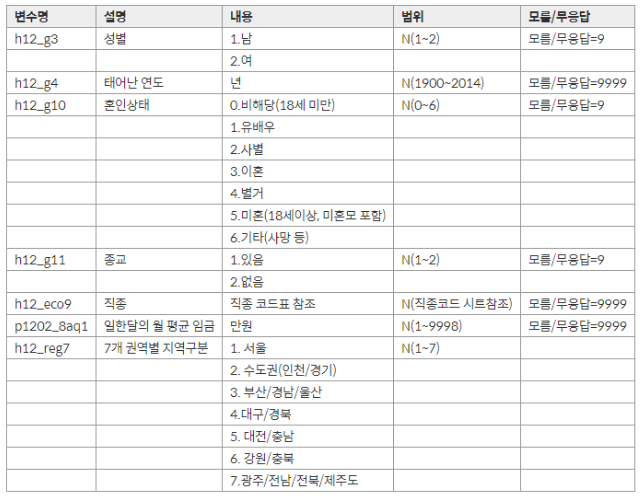

In [19]:
# image 불러오기

from IPython.display import Image
Image('C:/Users/a/Documents/SQL/data/visual/실습이미지.png' , width = 700)

In [32]:
lst = ['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']
name = ['성별' , '태어난 연도' , '혼인상태' , '종교' , '직종' , '일한달의 월 평균 임금' , '7개 권역별 지역구분']
koweps_subset = koweps[['h12_g3' , 'h12_g4' , 'h12_g10' , 'h12_g11' , 'h12_eco9' , 'p1202_8aq1' , 'h12_reg7']]

for i in range(len(lst)) :
    koweps_subset.rename(columns = {lst[i] : name[i]} , inplace=True)
koweps_subset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [31]:
# 데이터 분석
# 성별의 데이터 분포 확인
# 성별을 비율순으로 정렬
# 데이터 시각화


Text(0.5, 0, '성별')

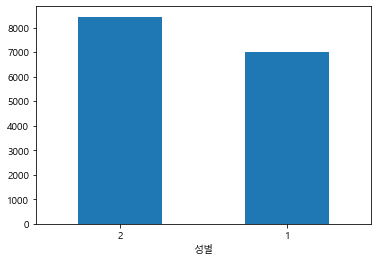

In [45]:
# 성별의 데이터 분포
# koweps_subset.filter(['성별'])
koweps_subset['성별'].value_counts()

koweps_subset.sort_values('성별' , ascending = False)

koweps_subset['성별'].value_counts().plot(kind='bar' , rot = 0)
plt.xlabel('성별')

In [ ]:
# 성별을 남, 여 변경한 성별 2 새로운 컬럼을 생성
# 성별 2 시각화

koweps_subset['성별2'] = koweps_subset['성별'].apply(lambda x : '남자' if x == 1 else '여자')

In [66]:
koweps_subset

,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2,성별3
0,2,1936,2,2,NaN,NaN,1,여자,여자
1,2,1945,2,2,NaN,NaN,1,여자,여자
2,1,1948,2,2,NaN,NaN,1,남자,남자
3,1,1942,3,1,762.0,108.9,1,남자,남자
4,2,1923,2,1,NaN,NaN,1,여자,여자
...,...,...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5,여자,여자
15418,2,1992,5,1,NaN,NaN,5,여자,여자
15419,1,1995,5,1,521.0,72.0,5,남자,남자
15420,2,1998,5,1,432.0,NaN,5,여자,여자


In [65]:
# np.where() : 조건에 만족하는 인덱스만 반환
# where - 조건 , 참 반환 , 거짓 반환
koweps_subset['성별3'] = np.where( koweps_subset['성별'] == 1 , '남자' , '여자')

<AxesSubplot:>

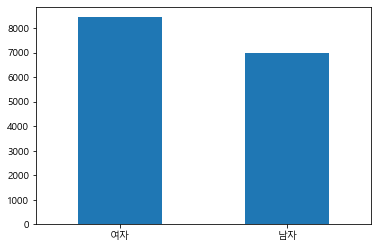

In [67]:
koweps_subset['성별2'].value_counts().plot(kind='bar' , rot = 0)

In [68]:
print('성별 분포에 따른 시각화 - bar')

성별 분포에 따른 시각화 - bar


In [ ]:
plt.figure()
koweps_subset['성별2'].value_counts().plot(kind='bar' , rot = 0)


In [79]:
gender_frm = pd.DataFrame(koweps_subset['성별2'].value_counts())
gender_frm.columns = ['명']
gender_frm

,명
여자,8440
남자,6982


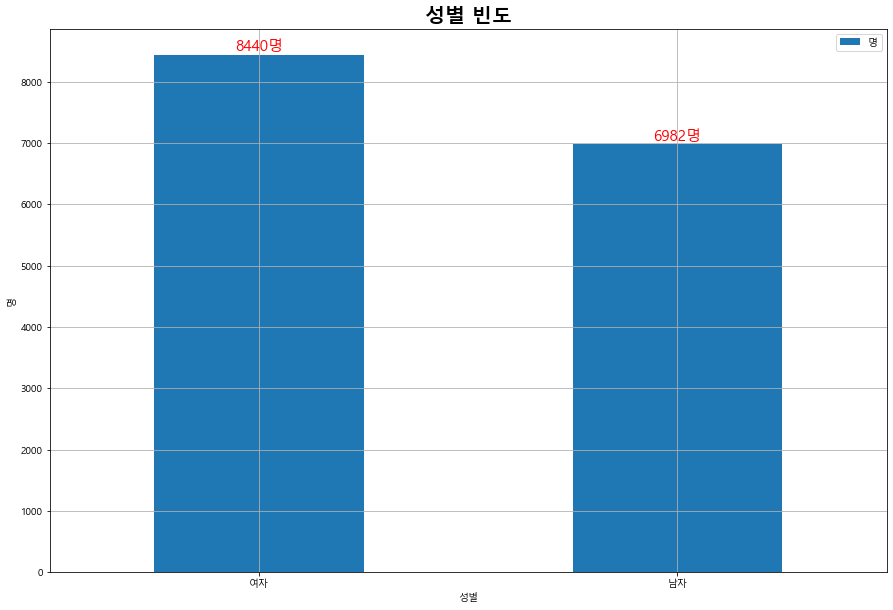

In [115]:
# plt.text()

gender_frm.plot(kind = 'bar' , rot = 0 , figsize = (15 , 10))

plt.grid()
plt.title('성별 빈도' , weight = 'bold' , size = 20)
plt.xlabel('성별')
plt.ylabel('명')

for idx, cnt in enumerate(list(gender_frm['명'])) :
    plt.text(idx , cnt , '%d명'%cnt  , 
            horizontalalignment = 'center' ,
            verticalalignment = 'bottom' ,
            fontsize = 15 ,
            color = 'red')

plt.show()
plt.close()

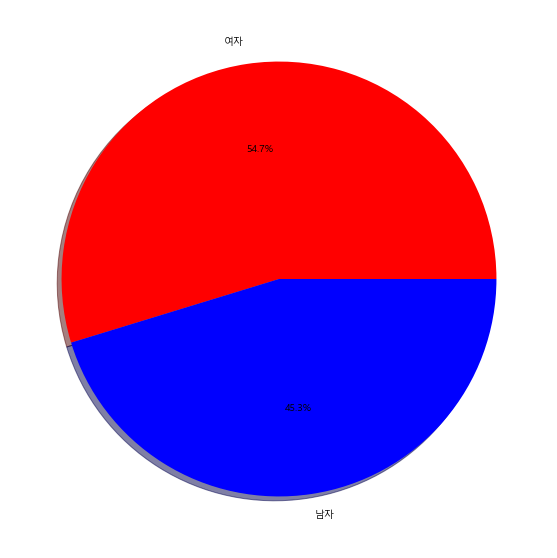

In [134]:
plt.figure(figsize = (10,10))
plt.pie(x = gender_frm['명'] , labels = gender_frm.index , autopct='%1.1f%%' , shadow = True , colors = ['red' , 'blue'])
plt.show()
plt.close()

In [ ]:
# autopct='%1.1f%%' format 퍼센트 (%정수 자리 개수 + . + 소수 자리 개수 + 자료형 %%)


plt.figure(figsize = (10,10))
plt.pie(sizes, labels = labels , autopct='%1.1f%%' , shadow = True)
plt.title('Pie Chart' )
plt.show()
plt.close()

# 성별에 따른 평균 급여 차이를 분석
- 성별과 월급 데이터만 추출
- 성별과 남자 여자로 변환
- 데이터 정제(결측값, 결측값 제거 , 이상치 처리) : 이상치 처리는 결측값으로 대체하고 제거한다.
- 성별에 따른 평균 급여를 시각화

# 나이에 따른 평균 급여 변화 [요구사항]
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화


<AxesSubplot:xlabel='성별2', ylabel='일한달의 월 평균 임금'>

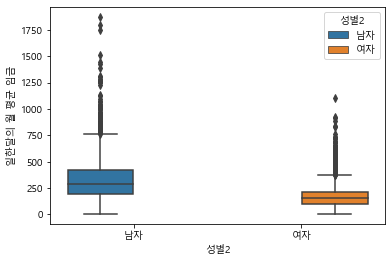

In [158]:
#sns.boxplot(data = titanic_frm , x = 'alive' , y = 'age' , hue = 'sex')

pay_gender = koweps_subset[koweps_subset['일한달의 월 평균 임금'].notnull()][['성별2' , '일한달의 월 평균 임금']]
sns.boxplot(data = pay_gender , x = '성별2' , y = '일한달의 월 평균 임금' , hue = '성별2')

In [162]:
pay_gender['일한달의 월 평균 임금']

3        108.9
10        20.0
16       322.0
17       120.0
24       300.0
         ...  
15400    230.0
15401    138.0
15404    286.0
15412    179.0
15419     72.0
Name: 일한달의 월 평균 임금, Length: 4507, dtype: float64

In [181]:
# 3사분위 정보를 얻어본다면
# quantitle()
# 1사분위 정보를 얻어본다면
print('1사분위 - \n' ,pay_gender.quantile(q=0.25))
print('2사분위 - \n' ,pay_gender.quantile(q=0.5))
print('3사분위 - \n' ,pay_gender.quantile(q=0.75))
print('4사분위 - \n' ,pay_gender.quantile(q=1))

# IQR (3사분위 수 - 1사분위 수의 차)

iqr = pay_gender.quantile(q=0.75) - pay_gender.quantile(q=0.25)
print()
print('iqr - ' , iqr)
print()

lower = abs(pay_gender.quantile(q=0.25) - 1.5 * iqr)
upper = pay_gender.quantile(q=0.75) + 1.5 * iqr

print()
print(lower)
print()
print(upper)

lower_gender = pay_gender[pay_gender > lower].min()
print('최저' , lower_gender)

upper_gender = pay_gender[pay_gender < upper].max()
upper_gender

1사분위 - 
 일한달의 월 평균 임금    135.0
Name: 0.25, dtype: float64
2사분위 - 
 일한달의 월 평균 임금    208.0
Name: 0.5, dtype: float64
3사분위 - 
 일한달의 월 평균 임금    336.0
Name: 0.75, dtype: float64
4사분위 - 
 일한달의 월 평균 임금    1874.0
Name: 1.0, dtype: float64

iqr -  일한달의 월 평균 임금    201.0
dtype: float64


일한달의 월 평균 임금    166.5
dtype: float64

일한달의 월 평균 임금    637.5
dtype: float64
최저 성별2              None
일한달의 월 평균 임금    167.0
dtype: object


성별2              None
일한달의 월 평균 임금    634.0
dtype: object

,성별2,일한달의 월 평균 임금
76,남자,841.0
80,남자,691.0
133,남자,1800.0
175,남자,693.0
244,남자,758.0
...,...,...
14970,남자,641.0
15019,남자,952.0
15195,남자,654.0
15292,남자,842.0


In [ ]:

# lower_frm = pay_gender['일한달의 월 평균 임금'] < lower_gender['일한달의 월 평균 임금']
# upper_frm = pay_gender['일한달의 월 평균 임금'] > upper_gender['일한달의 월 평균 임금']
# pay_gender[lower_frm]
# pay_gender[upper_frm]

# hwy_outlier_frm = mpg_frm.query('hwy > ' + str(upper_outlier['hwy']))
# cty_outlier_frm = mpg_frm.query('cty > ' + str(upper_outlier['cty']))
# result_frm = mpg_frm.copy()

In [196]:

lower_frm = pay_gender['일한달의 월 평균 임금'] < lower_gender['일한달의 월 평균 임금']
upper_frm = pay_gender['일한달의 월 평균 임금'] > upper_gender['일한달의 월 평균 임금']
pay_gender[lower_frm]
pay_gender[upper_frm]

for idx in pay_gender[lower_frm].index :
    pay_gender.loc[idx , '일한달의 월 평균 임금'] = np.NaN
for idx in pay_gender[upper_frm].index :
    pay_gender.loc[idx , '일한달의 월 평균 임금'] = np.NaN

In [324]:
answer_01 = pay_gender.dropna().reset_index(drop=True)
answer_01
pie_answer = answer_01.groupby('성별2').agg(np.mean).astype(int)


In [209]:
pie_answer

,일한달의 월 평균 임금
성별2,
남자,335
여자,260


([<matplotlib.patches.Wedge at 0x19266f43310>,
 [Text(-0.21637927065831808, 1.078508234196371, '남자'),
  Text(0.21637937163554516, -1.078508213937477, '여자')],
 [Text(-0.11802505672271894, 0.588277218652566, '56.3%'),
  Text(0.11802511180120642, -0.5882772076022602, '43.7%')])

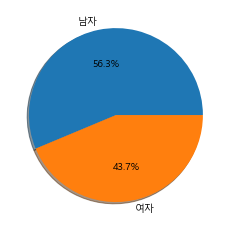

In [218]:
plt.pie(pie_answer['일한달의 월 평균 임금'], labels = pie_answer.index.to_list() , autopct='%1.1f%%' , shadow = True)

In [ ]:
# 나이에 따른 평균 급여 변화 [요구사항]
- 데이터 전처리(태어난 년도, 월급에 대한 컬럼 추출, 나이를 계산하여 파생변수 추가)
- 데이터 정제(결측값 확인, 결측값 제거, 이상치 결측 처리)
- 데이터 분석(나이별 따른 급여평균)
- 데이터 시각화


In [224]:
koweps_subset[['태어난 연도' , '일한달의 월 평균 임금']].isna().sum()

태어난 연도              0
일한달의 월 평균 임금    10915
dtype: int64

In [261]:
year_pay = koweps_subset[['태어난 연도' , '일한달의 월 평균 임금']].dropna()
year_pay

,태어난 연도,일한달의 월 평균 임금
3,1942,108.9
10,1940,20.0
16,1978,322.0
17,1975,120.0
24,1975,300.0
...,...,...
15400,1966,230.0
15401,1962,138.0
15404,1993,286.0
15412,1956,179.0


In [254]:
import datetime as dt
x = dt.datetime.now()
x.year

2022

<AxesSubplot:xlabel='연령대'>

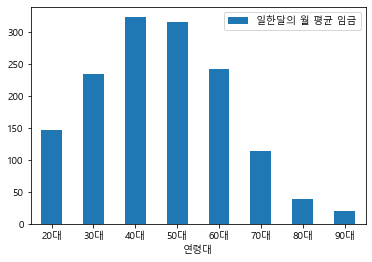

In [341]:
year_pay['나이'] = x.year - koweps_subset['태어난 연도']
year_pay['연령대'] = ((year_pay['나이'] // 10)).astype(str) + '0대'
year_pay
year_pay_frm = year_pay.groupby('연령대').agg(np.mean)[['일한달의 월 평균 임금']].astype(int)
year_pay_frm
year_pay_frm.plot(kind='bar' , rot = 0)

# def age_gen(df) :
#     return (df / 10).astype(int)

# year_pay.query('@age_gen(나이) == 8')

In [342]:
year_pay_frm = year_pay.groupby('연령대').agg(np.mean)[['일한달의 월 평균 임금']].astype(int)
year_pay_frm

,일한달의 월 평균 임금
연령대,
20대,148
30대,234
40대,323
50대,316
60대,243
70대,114
80대,39
90대,21


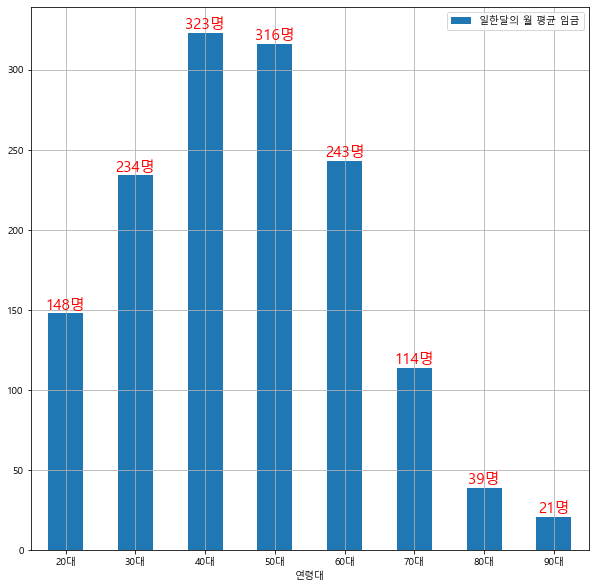

In [351]:

year_pay_frm.plot(kind='bar' , rot = 0 , figsize=(10,10))
for idx, value in enumerate(list(year_pay_frm['일한달의 월 평균 임금'])) :
    txt = '%d명' % value
    plt.text(idx , value , txt ,  
            horizontalalignment = 'center' ,
            verticalalignment = 'bottom' ,
            fontsize = 15 ,
            color = 'red')
plt.grid()
plt.show()
plt.close()

In [320]:
year_pay_frm.iloc[0].index[0]

'일한달의 월 평균 임금'

<AxesSubplot:xlabel='연령대', ylabel='일한달의 월 평균 임금'>

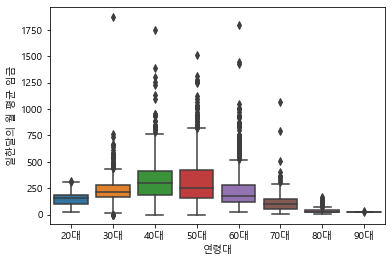

In [343]:
#sns.boxplot(data = titanic_frm , x = 'alive' , y = 'age' , hue = 'sex')

sns.boxplot(data = year_pay.sort_values('연령대') , x = '연령대' , y = '일한달의 월 평균 임금')

In [325]:
# 3사분위 정보를 얻어본다면
# quantitle()
# 1사분위 정보를 얻어본다면
print('1사분위 - \n' ,year_pay.quantile(q=0.25))
print('2사분위 - \n' ,year_pay.quantile(q=0.5))
print('3사분위 - \n' ,year_pay.quantile(q=0.75))
print('4사분위 - \n' ,year_pay.quantile(q=1))

# IQR (3사분위 수 - 1사분위 수의 차)

iqr = year_pay.quantile(q=0.75) - year_pay.quantile(q=0.25)
print()
print('iqr - ' , iqr)
print()

lower = abs(year_pay.quantile(q=0.25) - 1.5 * iqr)
upper = year_pay.quantile(q=0.75) + 1.5 * iqr

print()
print(lower)
print()
print(upper)

lower_pay = year_pay[year_pay > lower].min()
print('최저' , lower_pay)

upper_pay = year_pay[year_pay < upper].max()
upper_pay

1사분위 - 
 태어난 연도          1961.0
일한달의 월 평균 임금     135.0
나이                41.0
Name: 0.25, dtype: float64
2사분위 - 
 태어난 연도          1972.0
일한달의 월 평균 임금     208.0
나이                50.0
Name: 0.5, dtype: float64
3사분위 - 
 태어난 연도          1981.0
일한달의 월 평균 임금     336.0
나이                61.0
Name: 0.75, dtype: float64
4사분위 - 
 태어난 연도          1998.0
일한달의 월 평균 임금    1874.0
나이                95.0
Name: 1.0, dtype: float64

iqr -  태어난 연도           20.0
일한달의 월 평균 임금    201.0
나이               20.0
dtype: float64


태어난 연도          1931.0
일한달의 월 평균 임금     166.5
나이                11.0
dtype: float64

태어난 연도          2011.0
일한달의 월 평균 임금     637.5
나이                91.0
dtype: float64
최저 태어난 연도          1932.0
일한달의 월 평균 임금     167.0
나이                  24
연령대               None
dtype: object


태어난 연도           1998
일한달의 월 평균 임금    634.0
나이               90.0
연령대              None
dtype: object

In [331]:

lower_pay_frm = year_pay['일한달의 월 평균 임금'] < lower_pay['일한달의 월 평균 임금']
upper_pay_frm = year_pay['일한달의 월 평균 임금'] > upper_pay['일한달의 월 평균 임금']
year_pay[lower_pay_frm]
year_pay[upper_pay_frm]

for idx in year_pay[lower_pay_frm].index :
    pay_gender.loc[idx , '일한달의 월 평균 임금'] = np.NaN
for idx in year_pay[upper_pay_frm].index :
    pay_gender.loc[idx , '일한달의 월 평균 임금'] = np.NaN

In [414]:
year_pay[upper_pay_frm]
year_pay[lower_pay_frm]


,태어난 연도,일한달의 월 평균 임금,나이,연령대
15419,1995,72.0,27,20대
5019,1997,139.0,25,20대
5033,1997,153.0,25,20대
5062,1997,130.0,25,20대
1785,1995,150.0,27,20대
...,...,...,...,...
9274,1931,30.0,91,90대
8054,1928,20.0,94,90대
9299,1932,20.0,90,90대
12365,1931,20.0,91,90대


In [330]:
year_pay.dropna()

,태어난 연도,일한달의 월 평균 임금,나이,연령대
3,1942,108.9,80,80대
10,1940,20.0,82,80대
16,1978,322.0,44,40대
17,1975,120.0,47,40대
24,1975,300.0,47,40대
...,...,...,...,...
15400,1966,230.0,56,50대
15401,1962,138.0,60,60대
15404,1993,286.0,29,20대
15412,1956,179.0,66,60대


In [418]:
# 연령대별 월 평균 급여 변화
year_salary_subset = year_pay.copy()
# 이상치 - IQR
IQR = year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.75) - year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.25)
print('IQR - ', IQR)
print()


IQR -  201.0



In [419]:
# 이상치 - lower fence, upper fence
lower =  year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.25) - 1.5*IQR
print('lower fence - ', lower)
upper = year_salary_subset['일한달의 월 평균 임금'].quantile(q=0.75) + 1.5*IQR 
print('upper fence - ', upper)
print()


lower fence -  -166.5
upper fence -  637.5



In [426]:
# 극단치 경계 값 (아래 수평선, 위 수평선)
lower_outlier = year_salary_subset[year_salary_subset['일한달의 월 평균 임금'] > lower].min()
print('lower outlier - ', lower_outlier['일한달의 월 평균 임금'])

upper_outlier = year_salary_subset[year_salary_subset['일한달의 월 평균 임금'] < upper].max()
print('upper outlier - ', upper_outlier['일한달의 월 평균 임금'])
print()


lower outlier -  0.0
upper outlier -  634.0



In [427]:
# 이상치 데이터 추출
koweps_age_outlier = year_salary_subset[year_salary_subset['일한달의 월 평균 임금'] > upper_outlier['일한달의 월 평균 임금']]
display(koweps_age_outlier)
print()


,태어난 연도,일한달의 월 평균 임금,나이,연령대
5981,1987,1874.0,35,30대
5984,1986,760.0,36,30대
5344,1986,733.0,36,30대
11603,1985,667.0,37,30대
13505,1983,658.0,39,30대
...,...,...,...,...
5498,1957,655.0,65,60대
5566,1962,841.0,60,60대
5554,1960,1010.0,62,60대
1006,1952,795.0,70,70대


In [428]:
# 이상치를 결측값으로 변경
for idx in koweps_age_outlier.index :
    year_salary_subset.loc[idx, '일한달의 월 평균 임금'] = np.NaN


In [429]:
# 결측값 있는지 확인
print(year_salary_subset.isnull().sum())
print()
# 결측값 제거
year_salary_subset.dropna(inplace= True)
print()
print(year_salary_subset.isnull().sum())


태어난 연도            0
일한달의 월 평균 임금    207
나이                0
연령대               0
dtype: int64


태어난 연도          0
일한달의 월 평균 임금    0
나이              0
연령대             0
dtype: int64


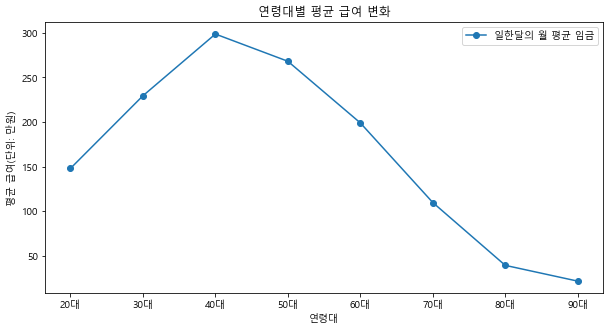

In [430]:
#시각화 
year_salary_subset[['연령대', '일한달의 월 평균 임금']].groupby('연령대').mean().plot(kind='line', rot=0, figsize =(10,5), marker = 'o')



plt.title('연령대별 평균 급여 변화')
plt.xlabel('연령대')
plt.ylabel('평균 급여(단위: 만원)')
plt.legend(loc = 'best')

plt.show()
plt.close()


연령때에 따른 분포

연령대별 평귭 급여 변화

성별과 연령대 분포 

성별과 연령대에 따른 평균 급여 변화

지역별 연령층 분포와 연령층별 지역비율


In [433]:
# 2 연령대별 평균 급여 변화

year_pay_data_01 = year_salary_subset.copy()
year_pay_data_01.drop('태어난 연도' , axis = 1 , inplace=True)

def unique_def(df) :
    return df.unique()
year_pay_data_01.sort_values('연령대' , inplace=True)
year_pay_data_01[year_pay_data_01['연령대'] == year_pay_data_01['연령대'].unique()[i]]



,일한달의 월 평균 임금,나이,연령대
9299,20.0,90,90대
8054,20.0,94,90대
9274,30.0,91,90대
3121,20.0,90,90대
12365,20.0,91,90대
5095,26.0,90,90대
10151,20.0,90,90대
10981,20.0,95,90대
7573,20.0,90,90대
12927,20.0,92,90대


,일한달의 월 평균 임금
나이,
24,89.333333
25,136.720000
26,140.807692
27,138.000000
28,145.652000
29,166.666667


,일한달의 월 평균 임금
나이,
30,176.439344
31,179.716471
32,201.438158
33,221.526437
34,233.471429
35,227.925000
36,243.572941
37,268.100000
38,255.169444


,일한달의 월 평균 임금
나이,
40,276.168908
41,279.217647
42,320.335294
43,302.539252
44,306.633333
45,310.416000
46,326.093694
47,288.891057
48,303.770769


,일한달의 월 평균 임금
나이,
50,296.481016
51,283.112782
52,283.285827
53,282.322609
54,273.352885
55,242.065476
56,263.390476
57,263.568421
58,225.586279


,일한달의 월 평균 임금
나이,
60,222.612289
61,214.267089
62,232.707595
63,229.802439
64,193.698462
65,177.056897
66,200.749206
67,184.296078
68,145.150943


,일한달의 월 평균 임금
나이,
70,149.984615
71,106.826667
72,119.907692
73,105.722222
74,101.100000
75,114.891304
76,125.037037
77,74.333333
78,70.772414


,일한달의 월 평균 임금
나이,
80,50.588636
81,45.782609
82,40.375000
83,26.300000
84,30.500000
85,36.176471
86,24.142857
87,45.111111
88,43.250000


,일한달의 월 평균 임금
나이,
90,21.2
91,25.0
92,20.0
94,20.0
95,20.0


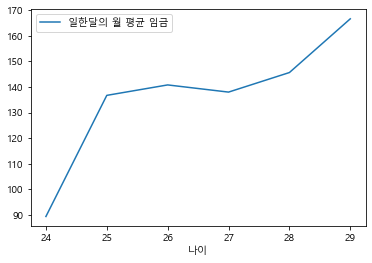

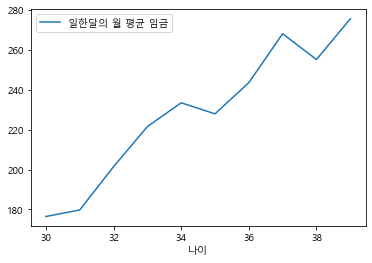

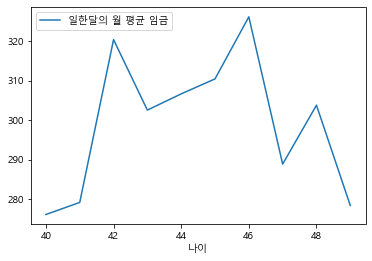

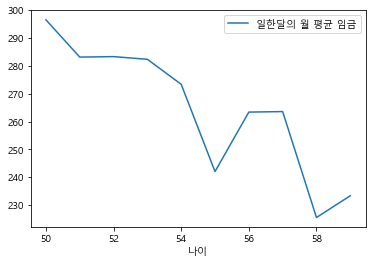

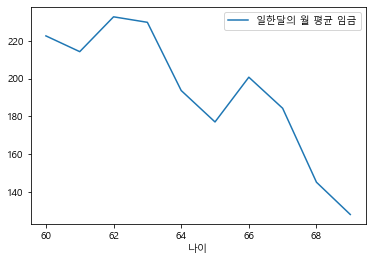

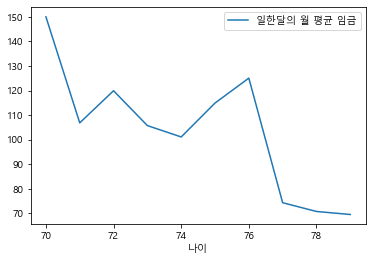

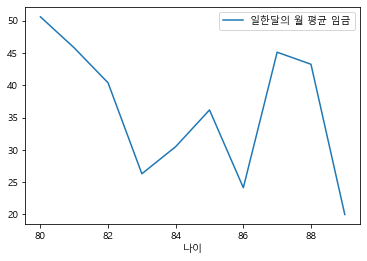

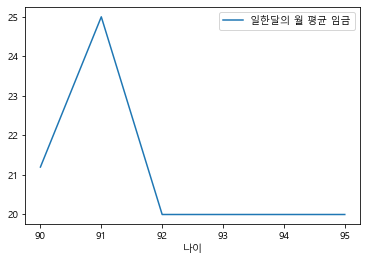

In [434]:
for i in range(len(year_pay_data_01['연령대'].unique())) :
    data = year_pay_data_01.query('연령대 == @unique_def(연령대)[@i]').sort_values('나이').groupby('나이').agg(np.mean)
    display(data)
    data.plot()


In [ ]:
for area in ['충청남도' , '경상북도' , '전라남도'] :
    plt.plot(seoul_frm.loc[area].index , seoul_frm.loc[area].values
        , marker = 'o' , label = area)

## 성별과 연령대에 따른 평균 급여 변화


In [477]:
gen_year_pay_data_01 = koweps_subset.copy()
gen_year_pay_data_01['연령대'] =((year_pay['나이'] // 10)).astype(str) + '0대'
gen_year_pay_data_01.dropna(inplace=True)
gen_year_pay_data_01


,성별,태어난 연도,혼인상태,종교,직종,일한달의 월 평균 임금,7개 권역별 지역구분,성별2,성별3,나이,연령대
3,1,1942,3,1,762.0,108.9,1,남자,남자,80,80대
10,2,1940,2,1,999.0,20.0,2,여자,여자,82,80대
16,1,1978,1,2,312.0,322.0,1,남자,남자,44,40대
17,2,1975,1,2,254.0,120.0,1,여자,여자,47,40대
24,1,1975,5,1,286.0,300.0,1,남자,남자,47,40대
...,...,...,...,...,...,...,...,...,...,...,...
15400,1,1966,1,1,874.0,230.0,6,남자,남자,56,50대
15401,2,1962,1,1,899.0,138.0,6,여자,여자,60,60대
15404,2,1993,5,2,411.0,286.0,5,여자,여자,29,20대
15412,1,1956,1,1,854.0,179.0,6,남자,남자,66,60대


In [490]:
data_plot = gen_year_pay_data_01.pivot_table(index = '성별2' , columns = '연령대' , values = '일한달의 월 평균 임금' , aggfunc = np.mean)
data_plot

연령대,20대,30대,40대,50대,60대,70대,80대,90대
성별2,,,,,,,,
남자,143.745763,262.242487,389.867719,412.900927,330.166087,158.890566,51.730986,20.000000
여자,149.913636,207.542172,222.988728,199.498063,150.576246,78.647980,30.876190,22.285714


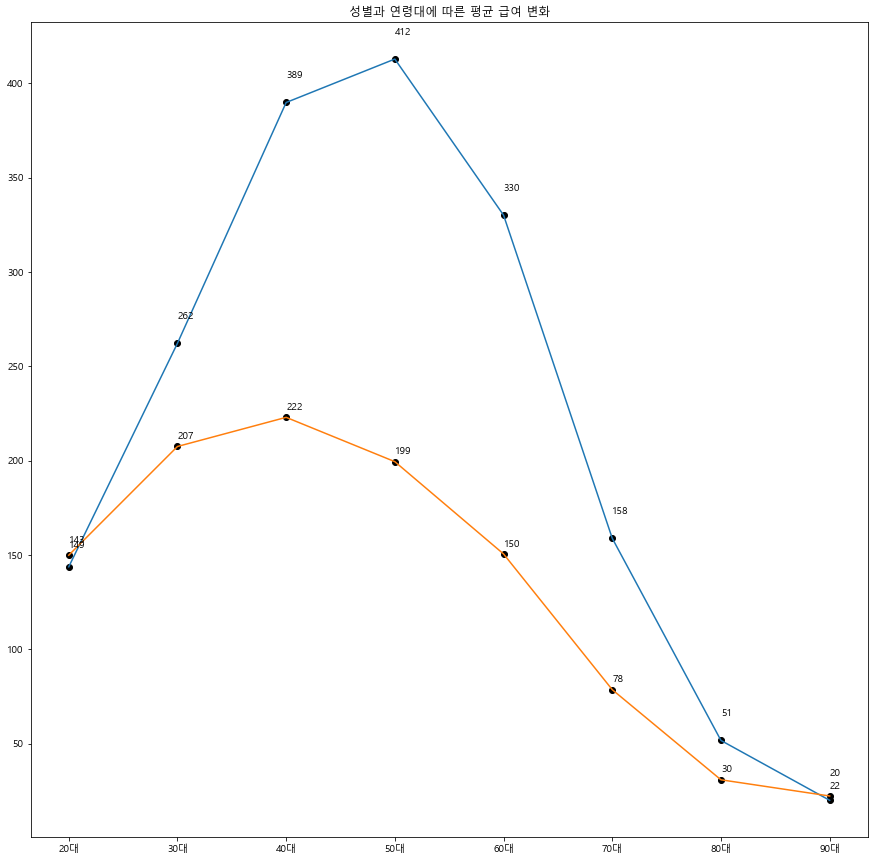

In [491]:
plt.figure(figsize = (15,15))
plt.plot(data_plot.columns , data_plot.values[0])
for i in range(len(data_plot.columns)) :
    plt.text(data_plot.columns[i] , data_plot.values[0][i] + 13 , str(int(data_plot.values[0][i])))
    plt.scatter(data_plot.columns[i] , data_plot.values[0][i] , color = 'black' )
    plt.text(data_plot.columns[i] , data_plot.values[1][i] + 4 , str(int(data_plot.values[1][i])))
    plt.scatter(data_plot.columns[i] , data_plot.values[1][i] , color = 'black' )

plt.title('성별과 연령대에 따른 평균 급여 변화')
plt.plot(data_plot.columns , data_plot.values[1])
plt.show()
plt.close()

## 지역별 연령층 분포와 연령층별 지역비율

In [559]:
gen_year_pay_data_02 = koweps_subset.copy()
gen_year_pay_data_02['연령대'] =((year_pay['나이'] // 10)).astype(str) + '0대'
gen_year_pay_data_02['cnt'] = 1
gen_year_pay_data_02 = gen_year_pay_data_02.dropna()
gen_year_pay_data_02[['연령대' , '7개 권역별 지역구분' , 'cnt']]
area = gen_year_pay_data_02[['연령대' , '7개 권역별 지역구분' , 'cnt']].pivot_table(index = '7개 권역별 지역구분' , columns = '연령대' , aggfunc = sum)
area.sum(axis=1)
area['합계'] = area.sum(axis=1)

lst = []

for i in range(len(area)):
    lst.append((area.iloc[i] / area['합계'].iloc[i]).to_list())
    
percent_area = round(pd.DataFrame(lst , index =  [1,2,3,4,5,6,7], columns = [str(i)+'0대' for i in range(2,11)]).drop('100대' , axis = 1) , 2)
percent_area







,20대,30대,40대,50대,60대,70대,80대,90대
1,0.04,0.21,0.25,0.24,0.16,0.07,0.03,NaN
2,0.05,0.16,0.26,0.27,0.15,0.08,0.02,0.00
3,0.02,0.20,0.25,0.23,0.17,0.10,0.03,NaN
4,0.05,0.14,0.22,0.24,0.19,0.10,0.06,0.00
5,0.08,0.14,0.30,0.23,0.13,0.06,0.06,0.01
6,0.04,0.13,0.25,0.27,0.16,0.08,0.06,0.00
7,0.03,0.17,0.28,0.24,0.14,0.07,0.06,0.01


In [545]:
area

cnt                                                   합계
연령대           20대    30대    40대    50대    60대   70대   80대  90대        
7개 권역별 지역구분                                                           
1            30.0  169.0  200.0  195.0  130.0  57.0  21.0  NaN   802.0
2            58.0  192.0  304.0  320.0  176.0  94.0  27.0  1.0  1172.0
3            16.0  147.0  180.0  165.0  121.0  71.0  18.0  NaN   718.0
4            23.0   65.0  104.0  111.0   91.0  46.0  28.0  2.0   470.0
5            29.0   51.0  107.0   84.0   45.0  20.0  21.0  2.0   359.0
6            14.0   41.0   79.0   83.0   50.0  25.0  19.0  1.0   312.0
7            21.0  117.0  187.0  163.0   96.0  44.0  42.0  4.0   674.0

<AxesSubplot:xlabel='7개 권역별 지역구분'>

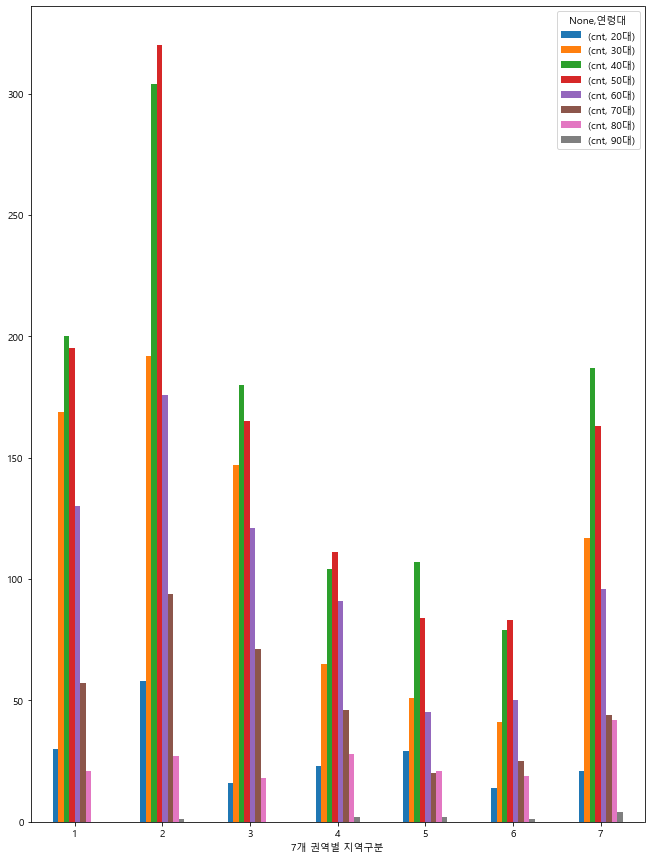

In [553]:
area.drop('합계' , axis = 1).plot(kind='bar', figsize = (11,15) ,rot = 0)

<AxesSubplot:>

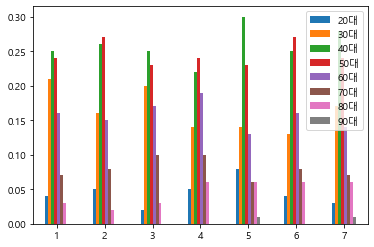

In [565]:
percent_area.plot(kind = 'bar' , rot = 0)

In [ ]:
gender_reg_tbl.plot(kind='bar', figsize = (20, 10), stacked = True)

plt.title('연령층별 지역비율 - stacked bar', weight = 'bold', size=20)
plt.xlabel('연령대', size = 15)
plt.ylabel('비율', size = 15, rotation= 0)

plt.yticks([0, 20, 40, 60, 80, 100], labels=['0%', '20%', '40%', '60%', '80%', '100%'])

# iterate through each bar container
for c in plt.containers: labels = [v.get_height() if v.get_height() > 0 else '' for v in c]

# add the annotations
plt.bar_label(c, fmt='%0.0f%%', label_type='center')

# move the legend
plt.legend(title='지역명', loc='best')


plt.show()
plt.close()
